In [2]:
from sklearn.datasets import make_blobs  # generates isotropic Gaussian blobs for clustering
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [4]:
# generate clusters
X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  random_state=0)

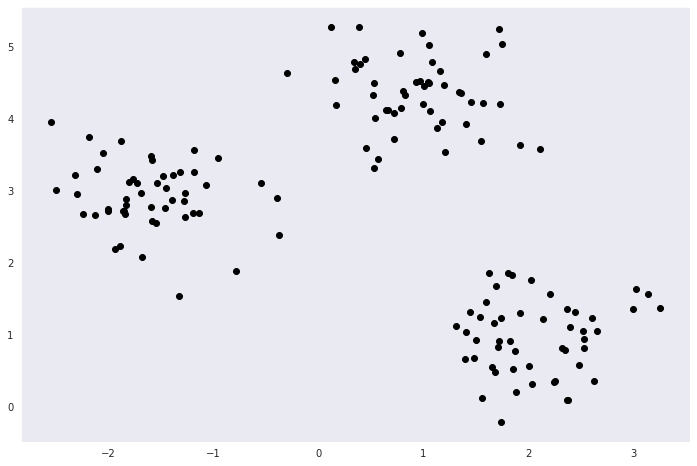

In [6]:
# set figure size
plt.rcParams["figure.figsize"] = (12, 8)

# plot clusters
plt.scatter(X[:, 0],
            X[:, 1],
            c='black',
            marker='o')
plt.grid()
plt.show()

### k-means Clustering

In [7]:
km = KMeans(n_clusters=3,  # how many clusters we expected
            n_init=10,  # how many initial runs
            random_state=0
            )

In [8]:
# fit and predict
y_km = km.fit_predict(X)

In [10]:
def plot_clusters(X, y_res, plt_cluster_centers=False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster, 0]
        y = X[y_res == cluster, 1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')
    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
        plt.legend()
        plt.grid()
        plt.show()

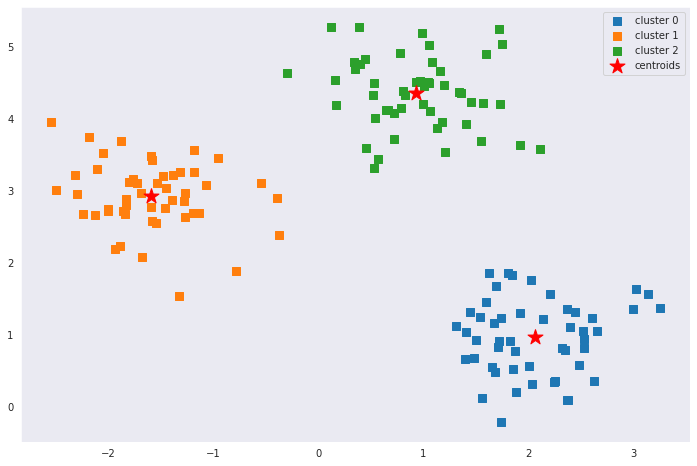

In [11]:
plot_clusters(X, y_km, plt_cluster_centers=True)

In [16]:
def plot_distortion(X, max_clusters=10):
    distortions = []
    for i in range(1, max_clusters + 1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1, max_clusters + 1), distortions, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.show()

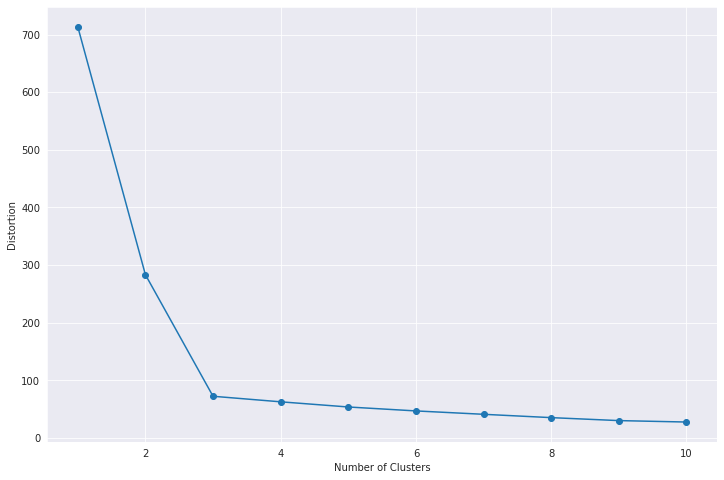

In [17]:
# elbow rule
plot_distortion(X, max_clusters=10)